In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import imread
import matplotlib.cbook as cbook
from PIL import Image

data = pd.read_csv("kc_house_data.csv")
school_data = pd.read_excel('kc_schools.xlsx')
data = data.drop_duplicates(subset=('id','lat','long','price'), keep='first')
data['lat_group'] = ''
data['long_group']=''

heat_data = pd.concat([data['price'], data['long'], data['lat']], axis=1, keys=['price', 'long','lat'])
heat_data = heat_data.reset_index()
heat_data = heat_data.groupby(['lat', 'long']).mean()
heat_data = heat_data.reset_index()
heat_data.head()

,lat,long,index,price
0,47.1559,-121.646,3295.0,380000.0
1,47.1593,-121.957,15599.0,687000.0
2,47.1622,-121.971,13006.0,750000.0
3,47.1647,-121.973,12669.0,335000.0
4,47.1764,-122.026,7719.0,245000.0


In [2]:
max_price = max(data['price'])
min_price = min(data['price'])
print('max_price: ', max_price)
print('min_price: ', min_price)

max_price:  7700000.0
min_price:  75000.0


In [3]:
heat = heat_data.pivot(index="lat", columns="long", values="price")
plt.subplots(figsize=(10,10))
plt.title('Price Heat Map')

ax = sns.heatmap(data=heat,vmin=min_price, vmax=600000,cmap="gist_rainbow") #gist_rainbow
ax.set_yticks([])
ax.set_xticks([])
ax.invert_yaxis()

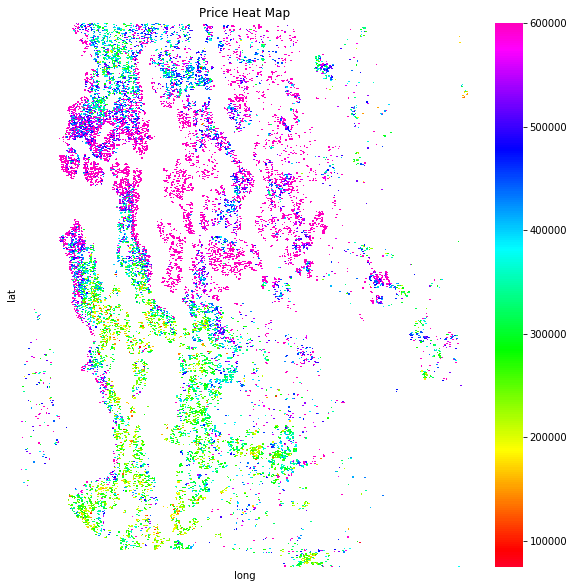

In [4]:
#plt.imshow(img,interpolation='none', aspect='auto')
plt.savefig('heatmap_kc.png')
plt.show()